In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./student_math.csv")
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0


In [5]:
#setting target and predictor variables
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

In [6]:
# 1. Number of features
num_features = len(X.columns)
print("Number of features: ",num_features)

Number of features:  41


In [7]:
#Performing a Train-Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
#Fitting a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
#Training Error
pred_train = model.predict(X_train)
MSE_train = np.mean((pred_train - y_train)**2)
    #MSE: mean squared error
print("Training Error: ", MSE_train)

Training Error:  2.626884180219627


In [11]:
# 2. Testing Error
pred_test = model.predict(X_test)
MSE_test = np.mean((pred_test - y_test)**2)
print("Testing Error: ", MSE_test)

Testing Error:  4.9873465739823395


We see that the error on the test data is almost double the error with the training data! This is definitely an indicator of overfitting. We’re now going to check the coefficients evaluated by the model to see if we can catch this.

In [12]:
#Calculating the regression coefficients
predictors = X.columns
coef = pd.Series(model.coef_,predictors).sort_values()

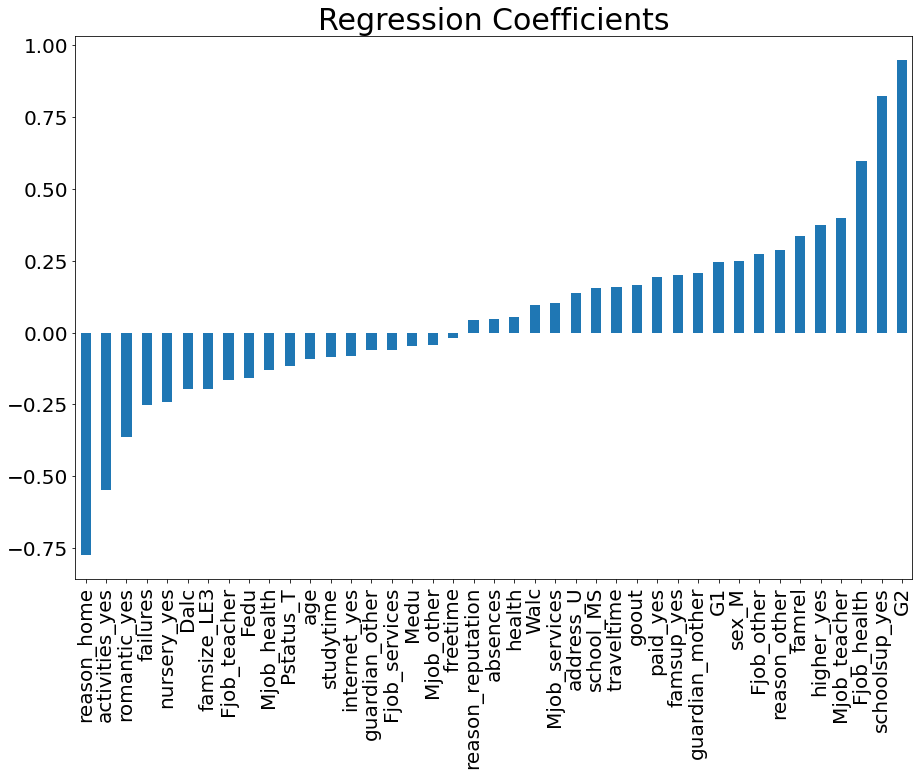

In [13]:
# 3. Plotting the Coefficients

plt.figure(figsize = (15,10))
coef.plot(kind='bar', fontsize = 20)
plt.title ("Regression Coefficients", fontsize = 30)
plt.show()